In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

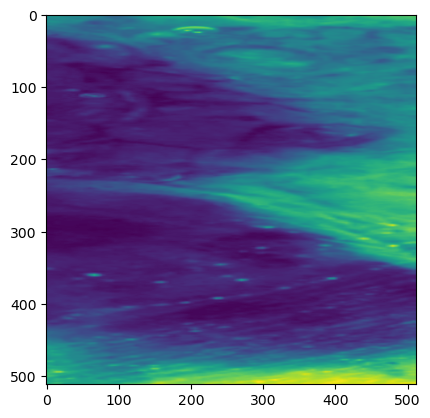

In [10]:
imshow(images[1001])

In [5]:
masks.shape

(12311, 512, 512, 1)

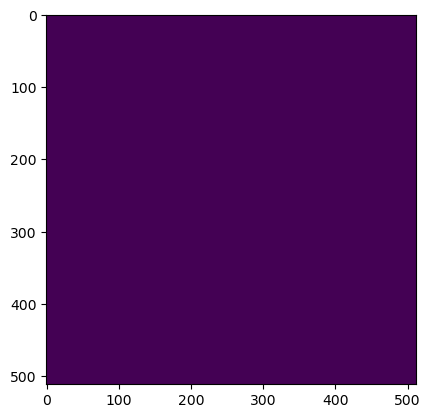

In [11]:
imshow(masks[1001])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [13]:
np.sum(masks[1001])

262144

In [15]:
np.prod(masks[1001])

1

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpb1gf65rukuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpb1gf65rukuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 20

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 698ms/step - loss: 0.5449 - dice_coeff: 0.3070 - val_loss: 0.5252 - val_dice_coeff: 0.3464
Epoch 2/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4738 - dice_coeff: 0.3866 - val_loss: 0.4244 - val_dice_coeff: 0.4871
Epoch 3/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4278 - dice_coeff: 0.4998 - val_loss: 0.4243 - val_dice_coeff: 0.4900
Epoch 4/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4194 - dice_coeff: 0.5094 - val_loss: 0.4071 - val_dice_coeff: 0.5443
Epoch 5/100
39/39 [==============================] - 19s 496ms/step - loss: 0.4203 - dice_coeff: 0.5024 - val_loss: 0.4122 - val_dice_coeff: 0.5379
Epoch 6/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4232 - dice_coeff: 0.5142 - val_loss: 0.4032 - val_dice_coeff: 0.5578
Model saved to: /tmp/tmpb1gf65rukuc_unet2d/kuc_unet2d_0kuc_unet2d_model
History saved to: /tmp/tmpb1g

Epoch 5/100
84/84 [==============================] - 32s 381ms/step - loss: 0.3367 - dice_coeff: 0.6217 - val_loss: 0.3628 - val_dice_coeff: 0.6202
Epoch 6/100
84/84 [==============================] - 31s 371ms/step - loss: 0.3339 - dice_coeff: 0.6221 - val_loss: 0.3283 - val_dice_coeff: 0.6311
Epoch 7/100
84/84 [==============================] - 31s 370ms/step - loss: 0.3307 - dice_coeff: 0.6278 - val_loss: 0.3206 - val_dice_coeff: 0.6528
Epoch 8/100
84/84 [==============================] - 31s 370ms/step - loss: 0.3300 - dice_coeff: 0.6291 - val_loss: 0.3103 - val_dice_coeff: 0.6719
Epoch 9/100
84/84 [==============================] - 31s 370ms/step - loss: 0.3262 - dice_coeff: 0.6372 - val_loss: 0.3308 - val_dice_coeff: 0.6072
Epoch 10/100
84/84 [==============================] - 31s 371ms/step - loss: 0.3188 - dice_coeff: 0.6413 - val_loss: 0.3160 - val_dice_coeff: 0.7033
Epoch 11/100
84/84 [==============================] - 31s 370ms/step - loss: 0.3034 - dice_coeff: 0.6670 - val_

24/24 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 373 machine labels.
Replacing 124 from 373 !
D_relabeled_ 124
point ids 124
Removed: 124 Filled: 124
TOOK 356.1891231536865 seconds
***
RUN: 11
Epoch 1/100
123/123 [==============================] - 48s 392ms/step - loss: 0.1988 - dice_coeff: 0.7907 - val_loss: 0.1972 - val_dice_coeff: 0.8039
Epoch 2/100
123/123 [==============================] - 41s 336ms/step - loss: 0.1932 - dice_coeff: 0.7954 - val_loss: 0.1985 - val_dice_coeff: 0.8074
Epoch 3/100
123/123 [==============================] - 41s 337ms/step - loss: 0.1967 - dice_coeff: 0.7922 - val_loss: 0.1989 - val_dice_coeff: 0.8057
Epoch 4/100
123/123 [==============================] - 41s 336ms/step - loss: 0.1925 - dice_coeff: 0.7977 - val_loss: 0.1980 - val_dice_coeff: 0.7918
Epoch 5/100
123/123 [==============================] - 41s 335ms/step - loss: 0.1885 - dice_coeff: 0.8006 - val_loss: 0.2019 - val_dice_coeff: 0.8115
Epoch 6/

Epoch 10/100
138/138 [==============================] - 45s 327ms/step - loss: 0.0726 - dice_coeff: 0.9260 - val_loss: 0.3127 - val_dice_coeff: 0.8227
Epoch 11/100
138/138 [==============================] - 45s 326ms/step - loss: 0.0724 - dice_coeff: 0.9254 - val_loss: 0.3312 - val_dice_coeff: 0.8251
Epoch 12/100
138/138 [==============================] - 45s 326ms/step - loss: 0.0756 - dice_coeff: 0.9227 - val_loss: 0.3017 - val_dice_coeff: 0.8220
Epoch 13/100
138/138 [==============================] - 45s 327ms/step - loss: 0.0731 - dice_coeff: 0.9249 - val_loss: 0.3149 - val_dice_coeff: 0.8219
Model saved to: /tmp/tmpb1gf65rukuc_unet2d/kuc_unet2d_13kuc_unet2d_model
History saved to: /tmp/tmpb1gf65rukuc_unet2d/kuc_unet2d_history_13.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 366 machine labels.
Replacing 122 from 366 !
D_relabeled_ 122
point ids 122
Removed: 122 Filled: 12

Epoch 1/100
177/177 [==============================] - 57s 321ms/step - loss: 0.0870 - dice_coeff: 0.9136 - val_loss: 0.2563 - val_dice_coeff: 0.8178
Epoch 2/100
177/177 [==============================] - 55s 311ms/step - loss: 0.0781 - dice_coeff: 0.9215 - val_loss: 0.2761 - val_dice_coeff: 0.8197
Epoch 3/100
177/177 [==============================] - 55s 310ms/step - loss: 0.0610 - dice_coeff: 0.9383 - val_loss: 0.3072 - val_dice_coeff: 0.8281
Epoch 4/100
177/177 [==============================] - 55s 311ms/step - loss: 0.0630 - dice_coeff: 0.9363 - val_loss: 0.3264 - val_dice_coeff: 0.8294
Epoch 5/100
177/177 [==============================] - 55s 311ms/step - loss: 0.0505 - dice_coeff: 0.9486 - val_loss: 0.3056 - val_dice_coeff: 0.8249
Epoch 6/100
177/177 [==============================] - 55s 311ms/step - loss: 0.0523 - dice_coeff: 0.9463 - val_loss: 0.3487 - val_dice_coeff: 0.8356
Epoch 7/100
177/177 [==============================] - 55s 311ms/step - loss: 0.0489 - dice_coeff: 0

In [17]:
R.classifier_scores # after 20 runs of GP2

[[0.4400540888309479, 0.5441337823867798],
 [0.44522517919540405, 0.529762864112854],
 [0.4486125409603119, 0.49800118803977966],
 [0.42769771814346313, 0.5479002594947815],
 [0.40837904810905457, 0.5793630480766296],
 [0.36114490032196045, 0.6103542447090149],
 [0.24600908160209656, 0.7409452199935913],
 [0.23540763556957245, 0.753428041934967],
 [0.2237463742494583, 0.761393129825592],
 [0.21302589774131775, 0.7723782062530518],
 [0.22205598652362823, 0.781282901763916],
 [0.21708835661411285, 0.7974579930305481],
 [0.2817704677581787, 0.822979748249054],
 [0.3317326307296753, 0.8223461508750916],
 [0.3338155448436737, 0.8283033967018127],
 [0.32532772421836853, 0.8285009860992432],
 [0.3833121657371521, 0.8277287483215332],
 [0.33179956674575806, 0.8362969756126404],
 [0.3435039818286896, 0.8326206207275391],
 [0.35986238718032837, 0.8375544548034668]]

In [18]:
R.discriminator_scores # after 20 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

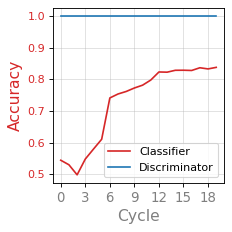

In [19]:
R.plot() # after 20 runs of GP2

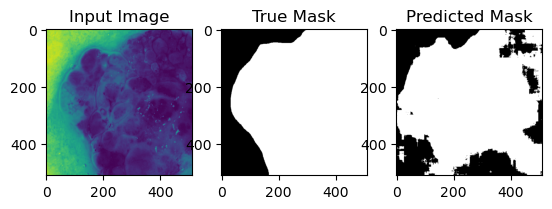

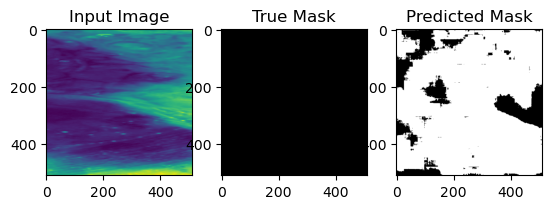

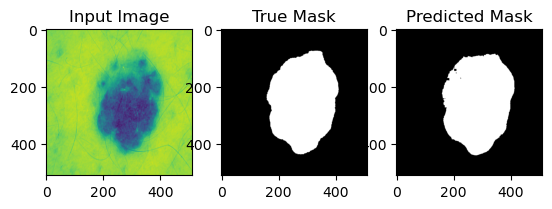

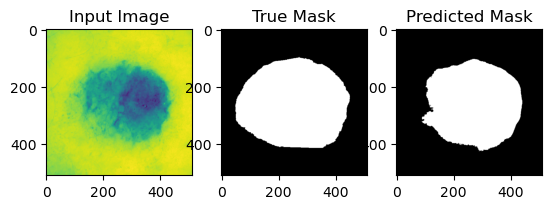

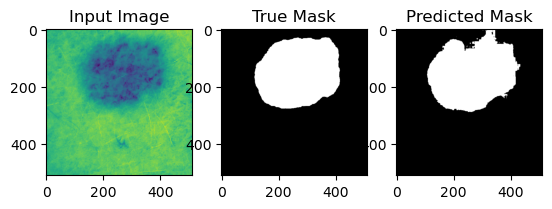

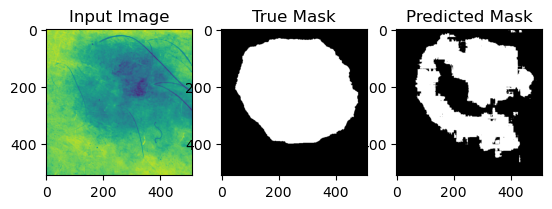

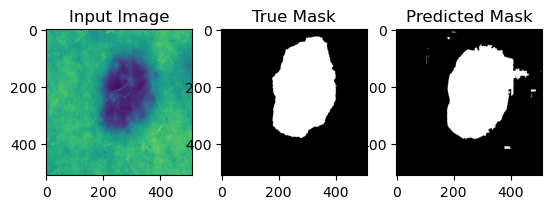

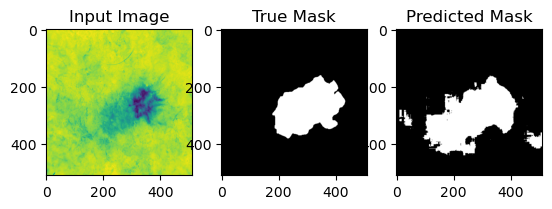

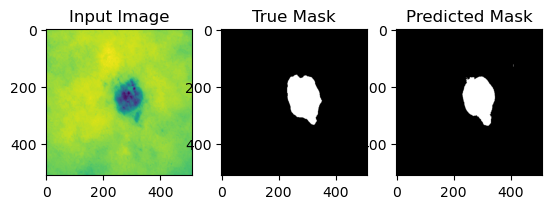

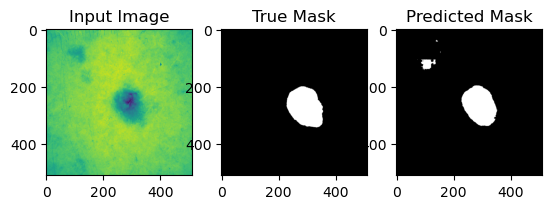

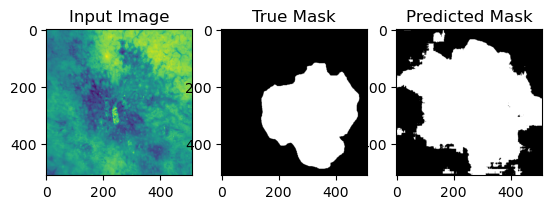

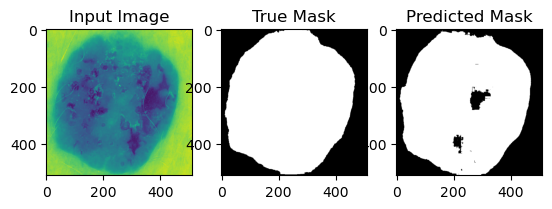

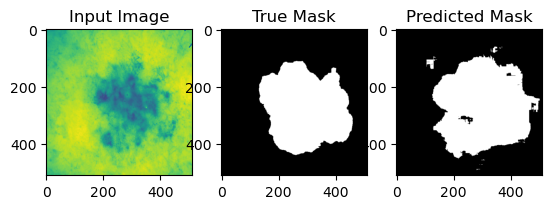

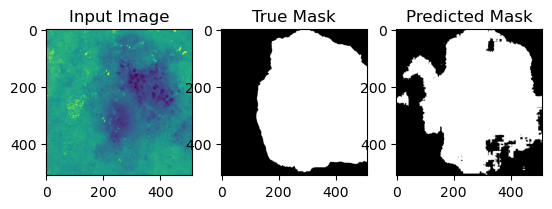

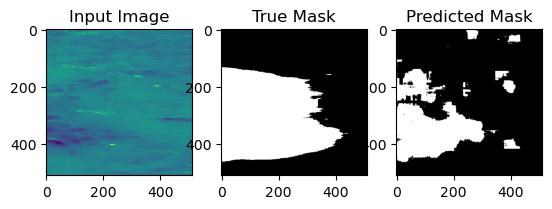

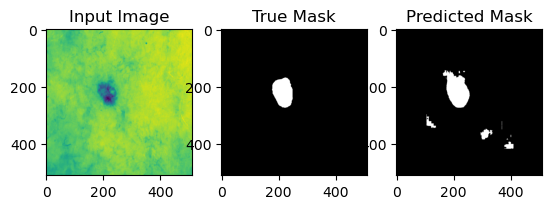

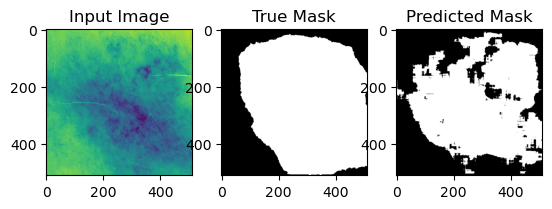

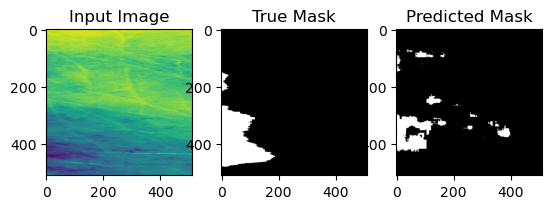

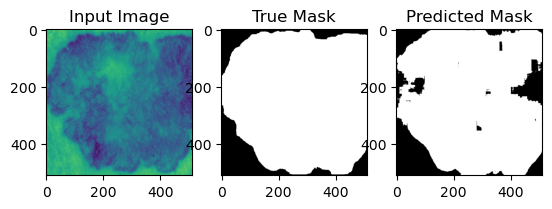

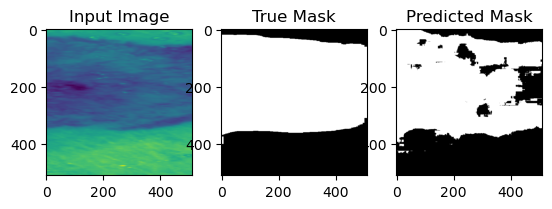

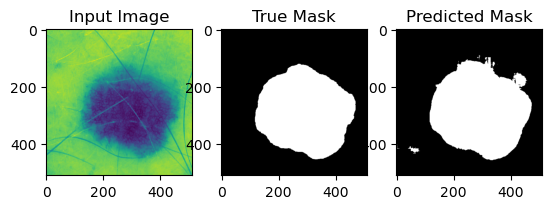

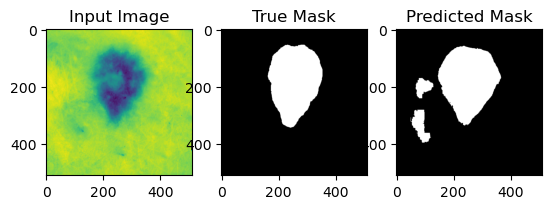

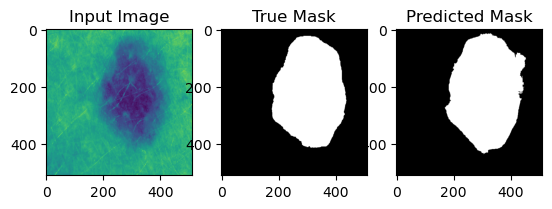

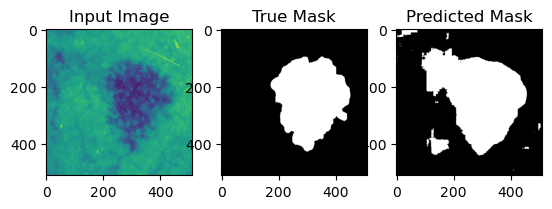

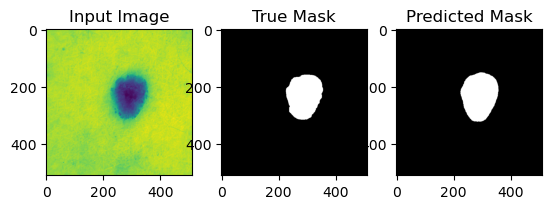

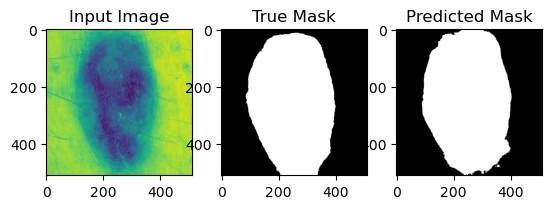

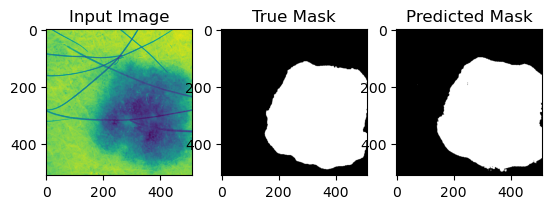

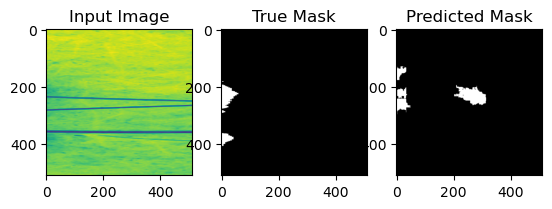

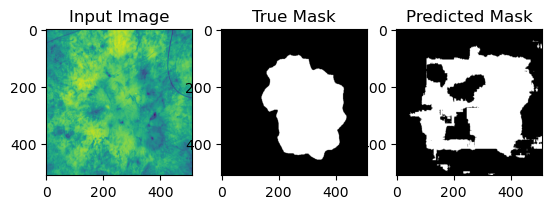

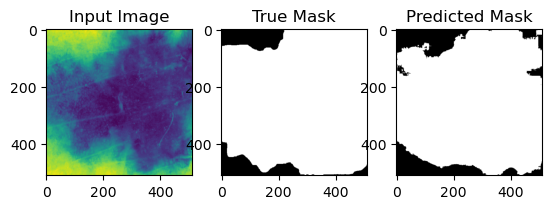

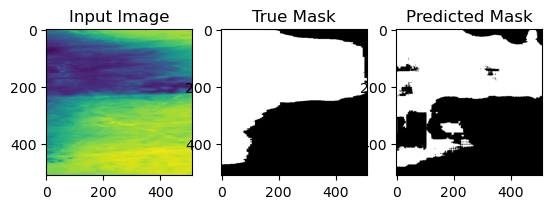

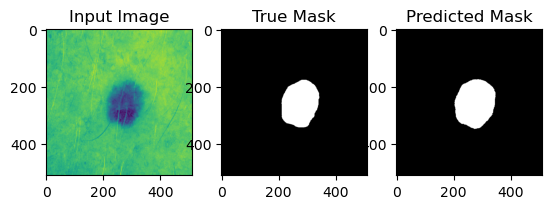

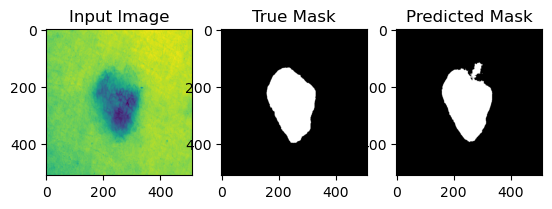

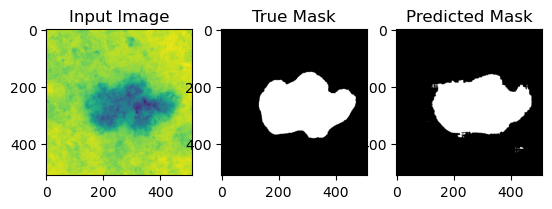

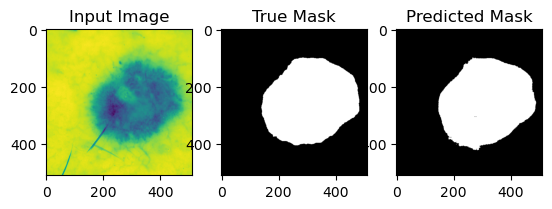

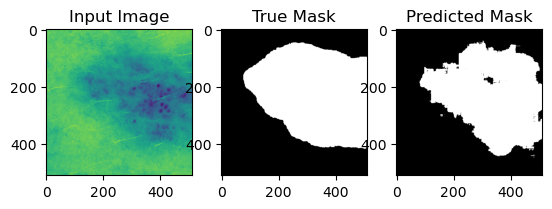

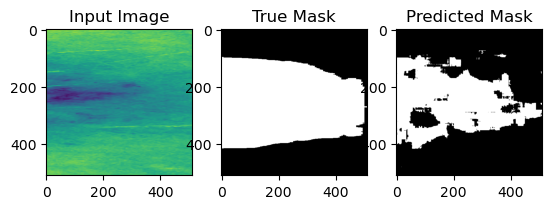

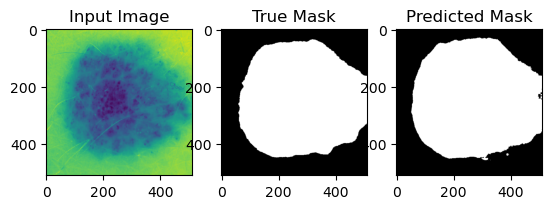

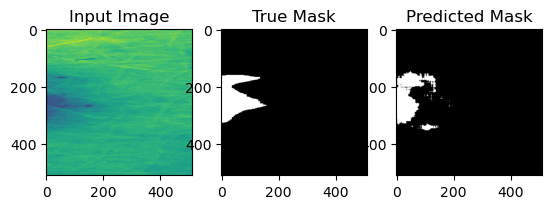

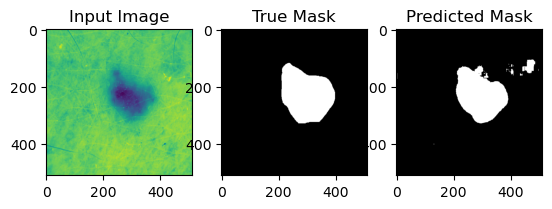

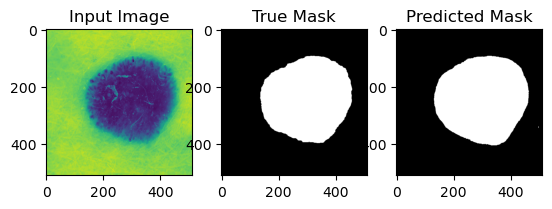

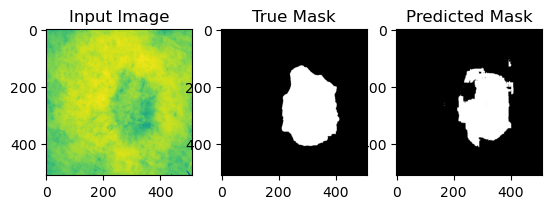

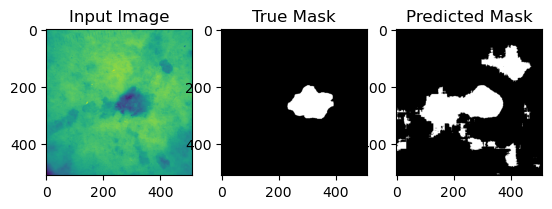

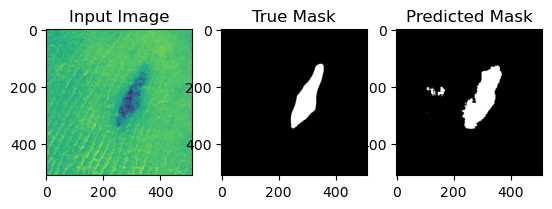

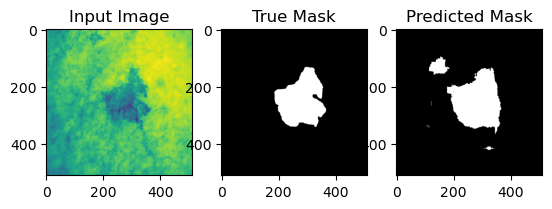

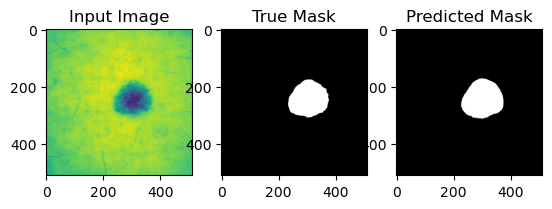

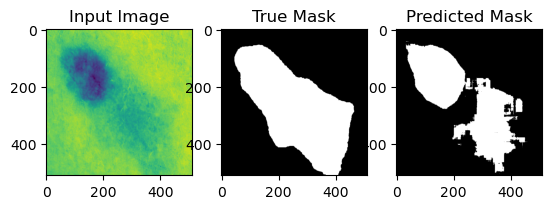

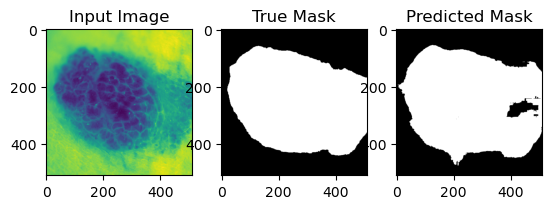

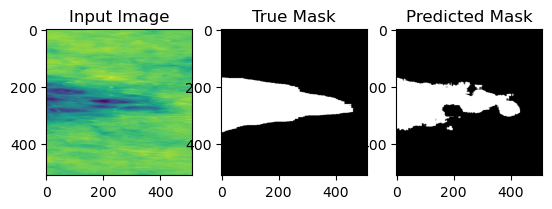

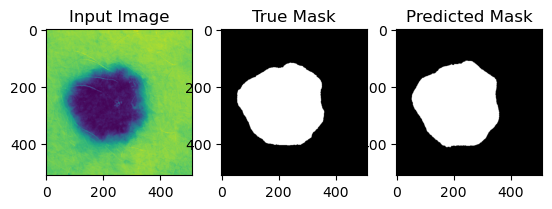

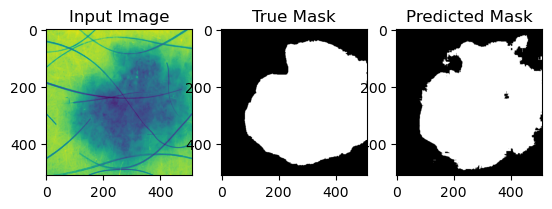

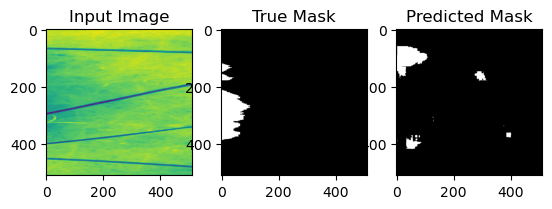

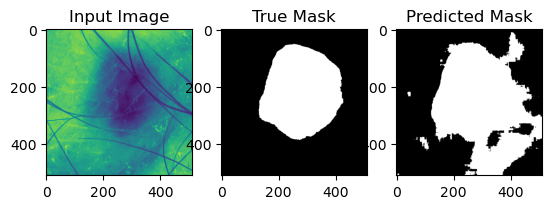

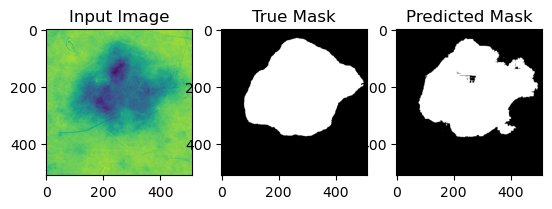

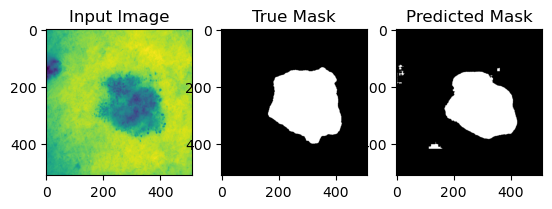

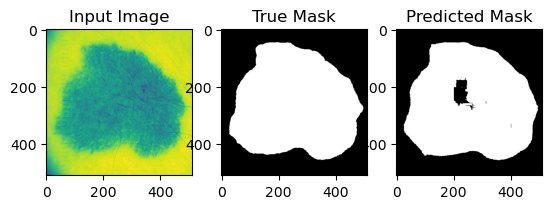

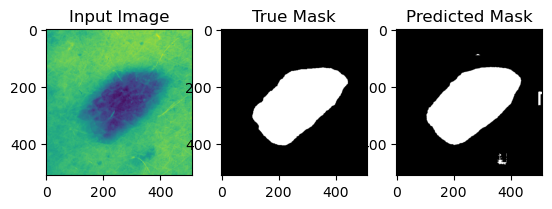

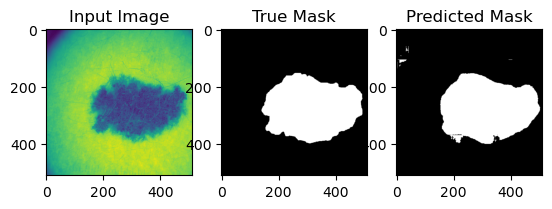

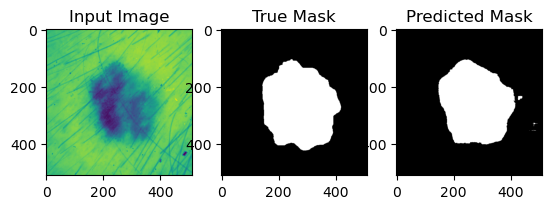

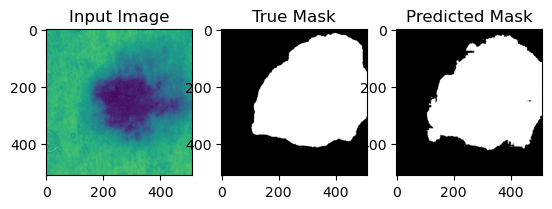

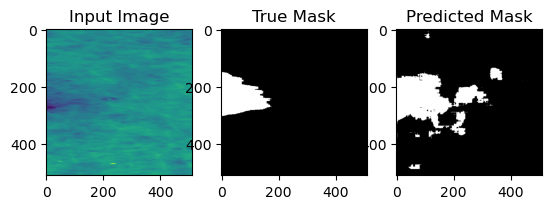

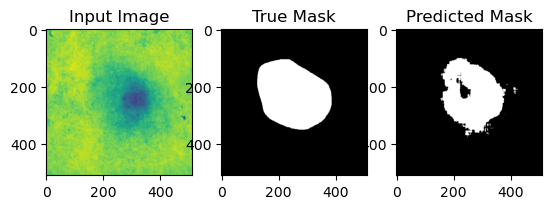

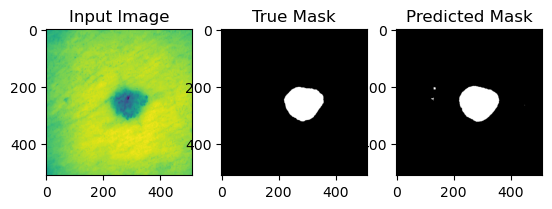

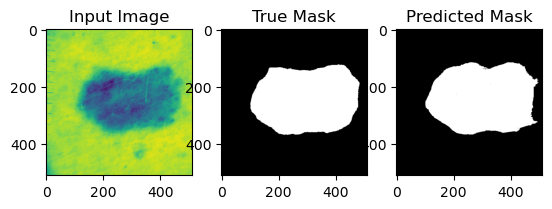

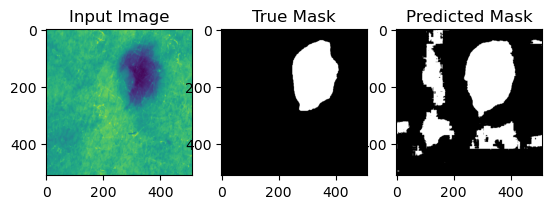

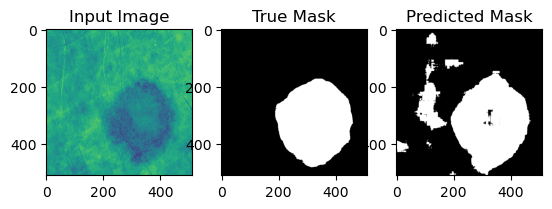

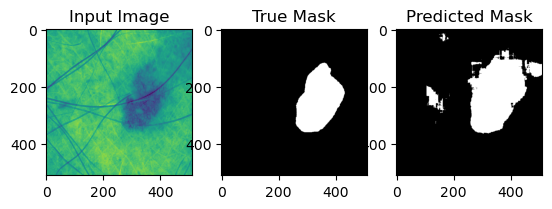

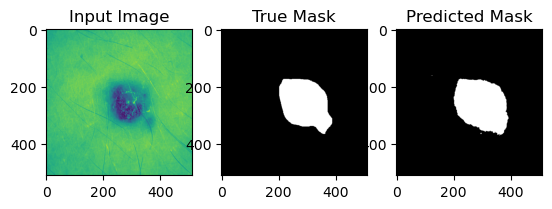

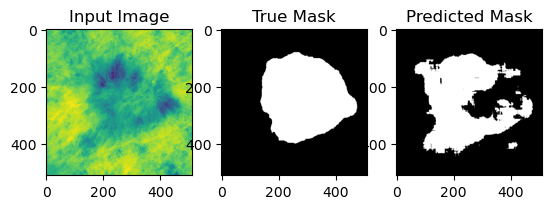

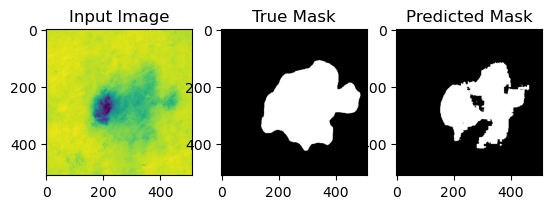

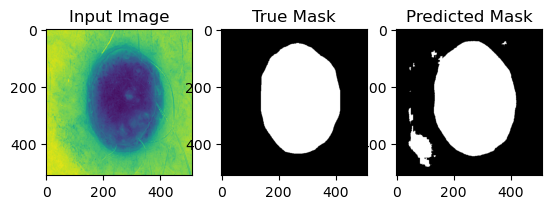

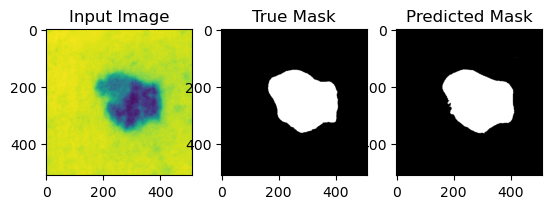

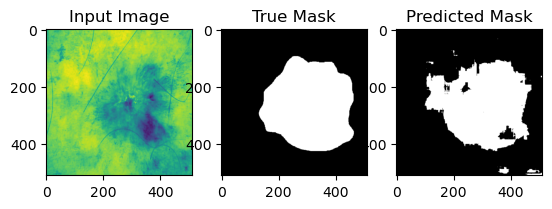

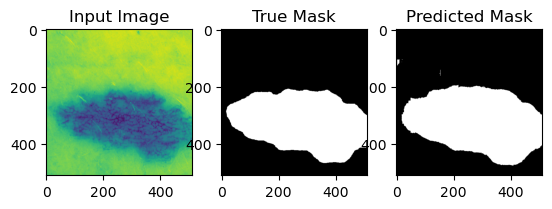

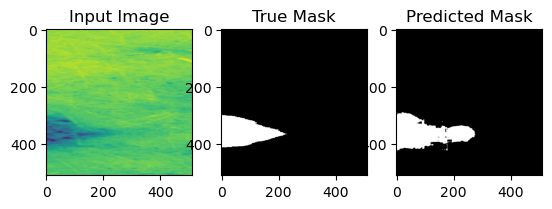

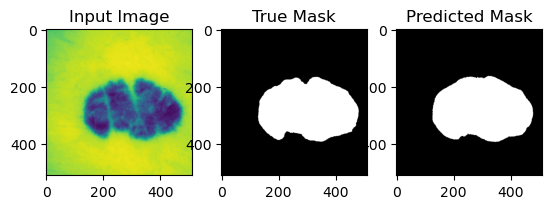

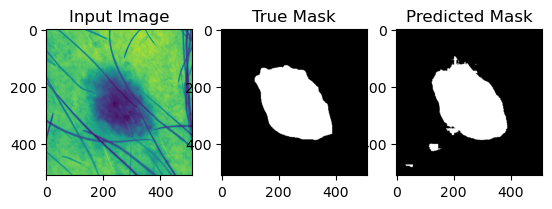

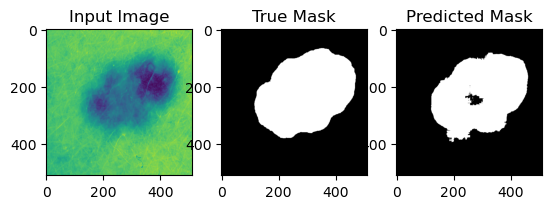

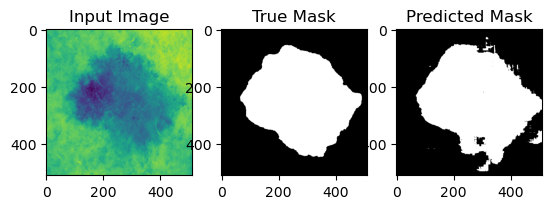

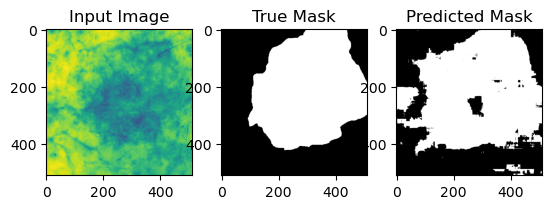

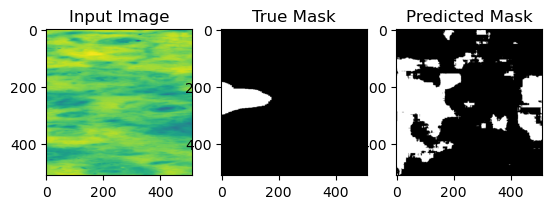

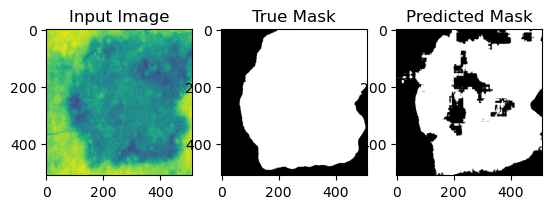

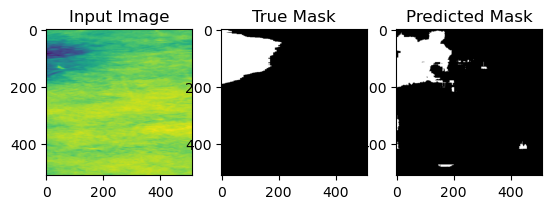

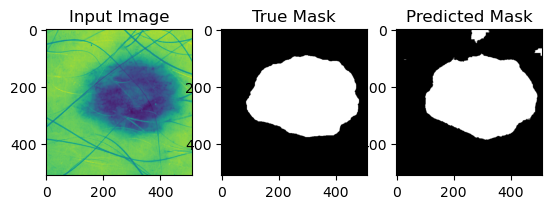

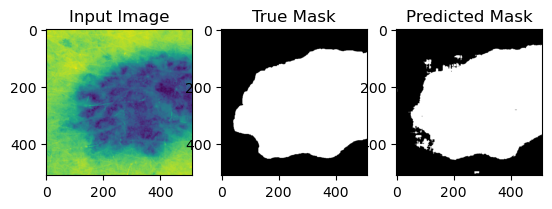

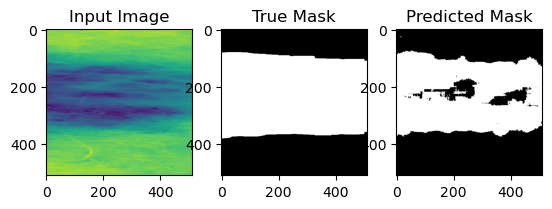

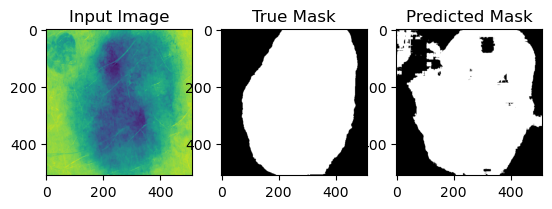

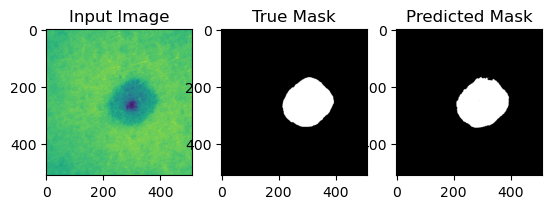

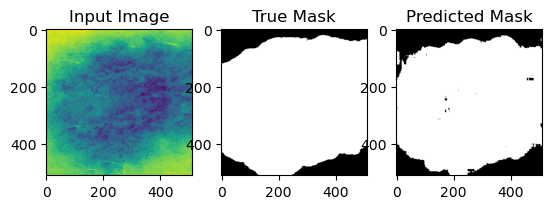

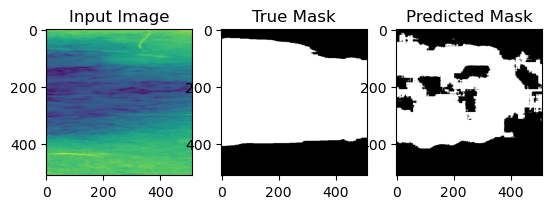

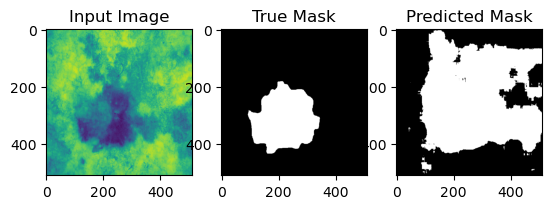

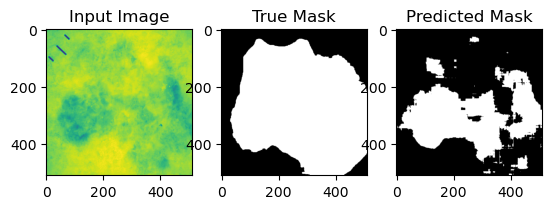

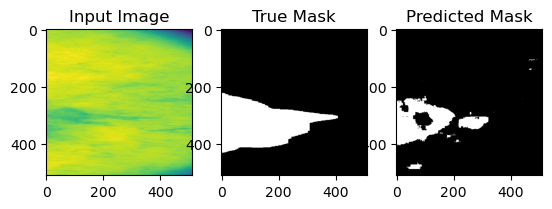

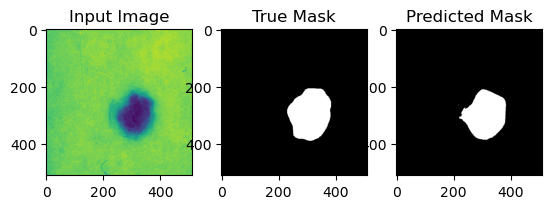

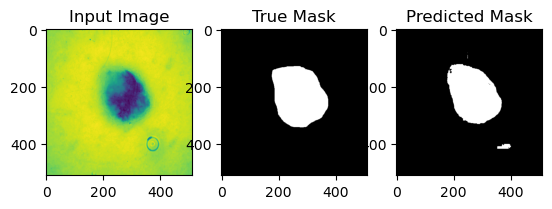

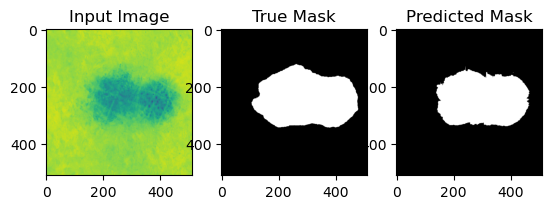

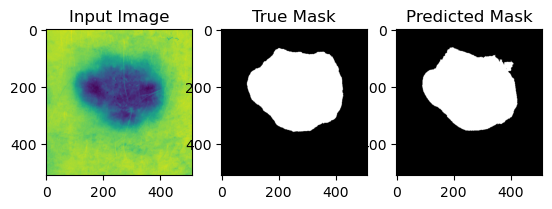

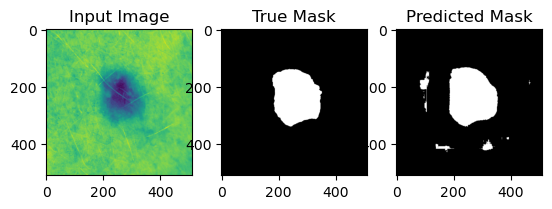

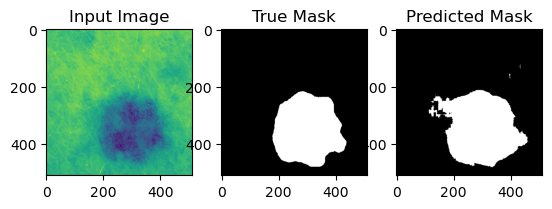

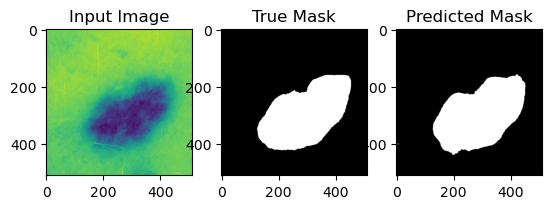

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 20 runs of GP2